In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

path = "../Data/"

In [2]:
abbr_dict = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",

    "DC": "District of Columbia",
    "AS": "American Samoa",
    "VI": "U.S. Virgin Islands",
    "MP": "Northern Mariana Islands",
    "GU": "Guam",
    "PR": "Puerto Rico",
    "UM": "U.S. Minor Outlying Islands"
}

* Unique identifier to eventually glue the map and tables together
* https://www2.census.gov/geo/docs/reference/codes2020/national_county2020.txt

In [3]:
unique_id = pd.read_csv(path + "FIPS.csv")
unique_id["STATE"] = unique_id["STATE ABBR"].map(abbr_dict)
unique_id.drop(columns=["CLASSFP", "FUNCSTAT"], inplace=True)
#unique_id

* Shapefile 2021
* https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/

In [4]:
gdf = gpd.read_file(path + "Shapefiles/" + "tl_2021_us_county.shp")
#gdf

Filter Mainland USA

In [5]:
min_longitude, max_longitude = -150, -50
min_latitude, max_latitude = 20, 50

gdf["INTPTLON"] = gdf["INTPTLON"].astype(float)
gdf["INTPTLAT"] = gdf["INTPTLAT"].astype(float)

gdf_filtered = gdf[(gdf["INTPTLON"] >= min_longitude) & 
                   (gdf["INTPTLON"] <= max_longitude) & 
                   (gdf["INTPTLAT"] >= min_latitude) & 
                   (gdf["INTPTLAT"] <= max_latitude)]
#gdf_filtered

In [6]:
counties = []

for id in zip(gdf_filtered["STATEFP"], gdf_filtered["COUNTYFP"]):
    counties.append(id)
len(counties)

3108

Example Plot

<Axes: >

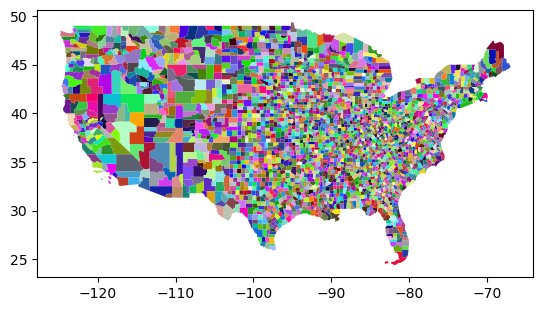

In [7]:
fig, ax = plt.subplots()
color = np.random.rand(len(gdf), 3)
gdf_filtered.plot(ax = ax, color = color)

* Community Resilience Estimates 2021
* https://data.census.gov/table/CRE2021.CRE?g=010XX00US$0500000&y=2021&d=CRE+Community+Resilience+Estimates

In [8]:
df1 = pd.read_csv(path + "CRE_2021.csv", index_col=0)
#df1

* ACS DEMOGRAPHIC AND HOUSING ESTIMATES 2021 
* https://data.census.gov/table/ACSDP1Y2021.DP05?g=010XX00US$0500000&y=2021&d=ACS+1-Year+Estimates+Data+Profiles

In [9]:
df2 = pd.read_csv(path + "DP05_2021.csv", index_col=0)
#df2

C:\Users\Pascal Gisiger\AppData\Local\Temp\ipykernel_20344\2208669130.py:1: DtypeWarning: Columns (337,1089,1141,11129) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path + "DP05_2021.csv", index_col=0)


* Some clean up
* Todo: Some columns have info about following ones in their name and are filled with just NaN's.

In [10]:
df2 = df2[[var for var in df2.columns if ("Estimate" in var or "Label" in var) and "Puerto Rico" not in var]]
df2.columns = df2.columns.str.replace('!!Estimate$', '', regex=True)
df2 = df2.T
#df2

Join Tables

In [11]:
joined_df = df1.join(df2)
joined_df

,"""Population Universe (POPUNI)""",Estimated number of individuals with zero risk factors (PRED0_E),Estimated margin of error for individuals with zero risk factor (PRED0_M),Rate of individuals with zero risk factors (PRED0_PE),Margin of error for the rate of individuals with zero risk factors (PRED0_PM),Estimated number of individuals with one-two risk factors (PRED12_E),Estimated margin of error for individuals with one-two risk factor (PRED12_M),Rate of individuals with one-two risk factors (PRED12_PE),Margin of error for the rate of individuals with one-two risk factors (PRED12_PM),Estimated number of individuals with three or more risk factors (PRED3_E),...,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and Three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male,Female
Geographic Area Name (NAME),,,,,,,,,,,,,,,,,,,,,
"Autauga County, Alabama","58,914","21,939","5,333",37.24%,9.05%,"24,867","5,491",42.21%,9.32%,"12,108",...,0,109,"1,575",377,"1,198","24,170",NaN,"43,906","21,018","22,888"
"Baldwin County, Alabama","237,874","81,276","19,891",34.17%,8.36%,"101,767","20,774",42.78%,8.73%,"54,831",...,9,959,"4,981",614,"4,367","121,763",NaN,"174,686","83,847","90,839"
"Barbour County, Alabama","22,301","5,294","1,838",23.74%,8.24%,"9,536","2,134",42.76%,9.57%,"7,471",...,1,229,474,92,382,"11,667",NaN,"19,623","10,571","9,052"
"Bibb County, Alabama","20,533","6,532","1,834",31.81%,8.93%,"7,912","1,979",38.53%,9.64%,"6,089",...,0,18,192,22,170,"9,013",NaN,"17,682","9,690","7,992"
"Blount County, Alabama","58,917","16,899","4,631",28.68%,7.86%,"27,353","4,961",46.43%,8.42%,"14,665",...,74,92,"1,479",466,"1,013","24,527",NaN,"43,633","21,535","22,098"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater County, Wyoming","41,016","16,602","3,825",40.48%,9.33%,"15,843","3,946",38.63%,9.62%,"8,571",...,14,160,828,271,557,"19,174",NaN,"30,055","15,515","14,540"
"Teton County, Wyoming","23,511","7,704","2,375",32.77%,10.10%,"11,639","2,487",49.50%,10.58%,"4,168",...,15,154,463,207,256,"13,255",NaN,"17,273","9,135","8,138"
"Uinta County, Wyoming","20,595","7,481","1,837",36.32%,8.92%,"9,456","1,919",45.91%,9.32%,"3,658",...,0,0,571,58,513,"8,819",NaN,"14,203","7,206","6,997"
